### Importing

In [62]:
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support,precision_score,recall_score,confusion_matrix,auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

## Metrics

In [66]:
def draw_confusion_matrix(y_actual, y_predicted):
    cm=confusion_matrix(y_actual, y_predicted)
    labels = ['Non-Factual', 'Factual']
    no_of_labels = 2
    print("\nConfusion matrix : ")
    x = PrettyTable()
    print("                   Predicted labels →")
    x.field_names = ["Actual labels ↓"] + [str(labels[i]) for i in range(no_of_labels)]
    for i in range(no_of_labels):
        ls = [(str(labels[i]))] + list(cm[i])
        x.add_row(ls)
    print(x) 

def draw_roc(y_actual, scores, title=''):
    fpr, tpr, thresholds = roc_curve(y_actual, scores, pos_label='1')
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr, label = 'AUC: '+str(round(roc_auc, 4)))
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('1-Specificity = FPR')
    plt.ylabel("Sensitivity = TPR = Recall")
    plt.title("AUC-ROC Curve: " + title)
    plt.legend(loc = 'lower right')
    plt.savefig(title+'-ROC')
    plt.show()
    
def metric(y_test, y_pred,scores, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn /(tn + fp)
    sensitivity = tp/(tp + fn)
    precission = tp/(tp + fp)
    f1 = (precission * sensitivity * 2) / (precission + sensitivity)
    acc = accuracy_score(y_test, y_pred)
    npv = tn/(tn + fn)
    fpr = fp/(fp + tn)
    rmc = 1.0 - acc
    x = PrettyTable()
    metr_list = []
    x.field_names = ["Evaluation Metric", "Score"]
    x.add_row(["Accuracy", round(acc, 4)])
    metr_list.append(round(acc, 4))
    x.add_row(["Recall", round(sensitivity, 4)])
    metr_list.append(round(sensitivity, 4))
    x.add_row(["Precision", round(precission, 4)])
    metr_list.append(round(precission, 4))
    x.add_row(["F1 score", round(f1, 4)])
    metr_list.append(round(f1, 4))
    print(x)
    draw_confusion_matrix(y_test, y_pred)
    draw_roc(y_test,scores, title)
    print('--------------------------------------------------------------\n\n')
    return metr_list

### loading

In [37]:
X=joblib.load('sav_1/vsm.sav')
dataset=joblib.load('dataset_with_labels.sav')
y=np.array(dataset)[:,1]

##### DataSet Noarmalization

In [4]:
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.81818182, 0.3       , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.89473684, 0.51351351, 0.16666667, ..., 0.33333333, 0.25      ,
        0.25      ],
       [0.96969697, 0.375     , 0.12903226, ..., 0.33333333, 0.        ,
        0.25      ],
       [0.9       , 0.44827586, 0.10714286, ..., 0.        , 0.        ,
        0.25      ]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Grid search params

In [6]:
Cs = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs}
clf = LinearSVC()

### GridSearch

In [7]:
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

### Fit

In [8]:
best_model = grid_search.fit(X_train, y_train)

### Train Data

+-------------------+--------+
| Evaluation Metric | Score  |
+-------------------+--------+
|      Accuracy     | 0.9525 |
|       Recall      | 0.9394 |
|     Precision     | 0.9546 |
|      F1 score     | 0.947  |
+-------------------+--------+

Confusion matrix : 
                   Predicted labels →
+-----------------+-------------+---------+
| Actual labels ↓ | Non-Factual | Factual |
+-----------------+-------------+---------+
|   Non-Factual   |     4700    |   179   |
|     Factual     |     243     |   3767  |
+-----------------+-------------+---------+


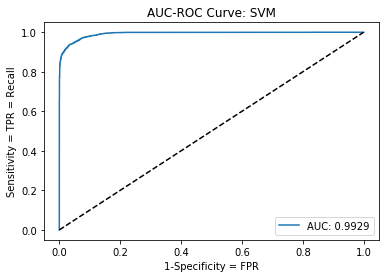

--------------------------------------------------------------




[0.9525, 0.9394, 0.9546, 0.947]

In [69]:
metric(y_train,best_model.predict(X_train),best_model.decision_function(X_train),'SVM')

### Test Data

+-------------------+--------+
| Evaluation Metric | Score  |
+-------------------+--------+
|      Accuracy     | 0.951  |
|       Recall      | 0.9438 |
|     Precision     | 0.9448 |
|      F1 score     | 0.9443 |
+-------------------+--------+

Confusion matrix : 
                   Predicted labels →
+-----------------+-------------+---------+
| Actual labels ↓ | Non-Factual | Factual |
+-----------------+-------------+---------+
|   Non-Factual   |     1190    |    54   |
|     Factual     |      55     |   924   |
+-----------------+-------------+---------+


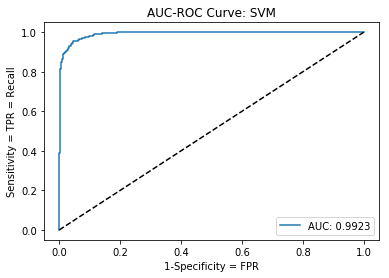

--------------------------------------------------------------




[0.951, 0.9438, 0.9448, 0.9443]

In [70]:
metric(y_test,best_model.predict(X_test),best_model.decision_function(X_test),'SVM')

In [72]:
# cm=confusion_matrix(y_test, best_model.predict(X_test))
# ax= plt.subplot()
# sns.heatmap(cm, annot=True, ax = ax,fmt='d',cmap='tab20c_r'); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['non_fact', 'fact']); ax.yaxis.set_ticklabels(['non_fact', 'fact']);

In [12]:
# target_names = ['0','1']
# print(classification_report(y_test, y_pred, target_names=target_names))